<a href="https://colab.research.google.com/github/Ananthalakshmi-k-a/college-demo/blob/main/shape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

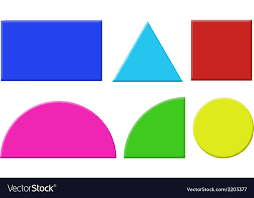

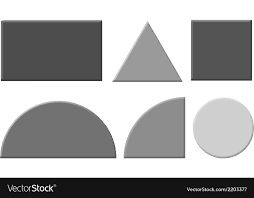

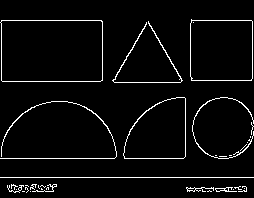

1
2
8
1
1
1
3
6
8
8
7
6
8
8
4
4
9
6
11
7
2
2
2
2
2
1
2
8
7
8
5
6
4
4


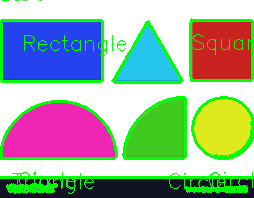

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('images.png')

# Check if the image was loaded successfully
if img is None:
    print("Error: Unable to load the image.")
else:
    # Display the original image
    cv2_imshow(img)
    cv2.waitKey(0)

    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Display the grayscale image
    cv2_imshow(gray_img)
    cv2.waitKey(0)

    # Apply Canny edge detection
    edges = cv2.Canny(gray_img, 50, 200)

    # Display the edges
    cv2_imshow(edges)
    cv2.waitKey(0)

    # Find contours in the edge-detected image
    contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Loop over the contours to detect shapes
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.03 * cv2.arcLength(cnt, True), True)
        print(len(approx))

        # Initialize shape
        shape = ''

        # Detect shapes based on the number of vertices
        if len(approx) == 3:
            shape = 'Triangle'
        elif len(approx) == 4:
            x, y, w, h = cv2.boundingRect(cnt)
            if abs(w - h) < 5:
                shape = 'Square'
            else:
                shape = 'Rectangle'
        elif len(approx) == 10:
            shape = 'Star'
        elif len(approx) == 8:
            shape = 'Circle'

        # Calculate centroid of the contour
        M = cv2.moments(approx)
        if M['m00'] != 0:
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
        else:
            cx = 0
            cy = 0

        # Put text indicating the detected shape on the image
        cv2.putText(img, shape, (cx - 30, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 1)

        # Draw contours on the original image
        cv2.drawContours(img, cnt, -1, (0, 255, 0), 2)

    # Display the final image with detected shapes
    cv2_imshow(img)

    # Close all OpenCV windows
    cv2.destroyAllWindows()
